In [1]:
import torch
import torch as nn
import pandas as pd
import numpy as np

In [2]:
import torch.nn.functional as F

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = '/content/drive/MyDrive/NYCTaxiFares.csv'

In [5]:
data = pd.read_csv(data)

In [6]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [8]:
data['fare_class'].unique()

array([0, 1])

In [9]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [10]:
data['d_km'] = haversine_distance(data, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [11]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,d_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [12]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [13]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,d_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [14]:
data['EDT'] = data['pickup_datetime'] - pd.Timedelta(hours=4)

In [15]:
data['AmorPm'] = np.where(data['EDT'].dt.hour<12, 'am', 'pm')

In [16]:
data['Hour'] = data['EDT'].dt.hour

In [17]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,d_km,EDT,AmorPm,Hour
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,am,4
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,am,11
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,am,7
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,pm,17
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,pm,22


In [18]:
data['Weekday'] = data['EDT'].dt.strftime("%a")

In [19]:
data.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,d_km,EDT,AmorPm,Hour,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,am,4,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,am,11,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,am,7,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,pm,17,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,pm,22,Fri


In [20]:
cat_cols = ['AmorPm', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'd_km']
y_col = ['fare_amount']

In [21]:
for cat in cat_cols:
  data[cat] = data[cat].astype('category')

In [23]:
data['AmorPm'].cat.codes

,0
0,0
1,0
2,0
3,1
4,1
...,...
119995,0
119996,0
119997,1
119998,0


In [24]:
ampm = data['AmorPm'].cat.codes.values
wkdy = data['Weekday'].cat.codes.values
cats = np.stack([ampm, wkdy], 1)

In [25]:
cats = torch.tensor(cats, dtype=torch.int64)

In [26]:
cats

tensor([[0, 1],
        [0, 2],
        [0, 2],
        ...,
        [1, 3],
        [0, 5],
        [1, 2]])

In [27]:
conts = np.stack([data[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)

In [28]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [29]:
y = torch.tensor(data[y_col].values, dtype=torch.float).reshape(-1,1)

In [30]:
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   d_km               120000 non-null  float64            
 9   EDT                120000 non-null  datetime64[ns, UTC]
 10  AmorPm             120000 non-null  category           
 11  Hour               120000 non-null  int32              
 12  Weekday            120000 non-

In [34]:
min(20,2)

2

In [35]:
cat_szs = [len(data[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (7, 4)]

In [36]:
from torch import nn

In [37]:
[nn.Embedding(ni, nf) for ni,nf in emb_szs]

[Embedding(2, 1), Embedding(7, 4)]

In [39]:
nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(7, 4)
)

In [40]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [41]:
emb_szs = [(2, 1), (7, 4)]
model = TabularModel(emb_szs, 6, 1, [200,200], p=0.4)

In [42]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=200, out_features=1, bias=True)
  )
)

In [43]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [45]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)

    # a neat trick to save screen space:
    if i%10 == 0:
        print(f'epoch: {i}  loss: {loss.item():4f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = time.time()
print(f'\nDuration: {end_time - start_time:.0f} seconds') # print the time elapsed

epoch: 10  loss: 11.110536
epoch: 20  loss: 10.550829
epoch: 30  loss: 10.336562
epoch: 40  loss: 10.173132
epoch: 50  loss: 10.019684
epoch: 60  loss: 9.840722
epoch: 70  loss: 9.633806
epoch: 80  loss: 9.358109
epoch: 90  loss: 9.000589
epoch: 100  loss: 8.572232
epoch: 110  loss: 8.045090
epoch: 120  loss: 7.442239
epoch: 130  loss: 6.760885
epoch: 140  loss: 6.043290
epoch: 150  loss: 5.315609
epoch: 160  loss: 4.674591
epoch: 170  loss: 4.209594
epoch: 180  loss: 3.918679
epoch: 190  loss: 3.822573
epoch: 200  loss: 3.791793
epoch: 210  loss: 3.748863
epoch: 220  loss: 3.701864
epoch: 230  loss: 3.688533
epoch: 240  loss: 3.669619
epoch: 250  loss: 3.620326
epoch: 260  loss: 3.583133
epoch: 270  loss: 3.607813
epoch: 280  loss: 3.555997
epoch: 290  loss: 3.529695
epoch: 300  loss: 3.534842

Duration: 290 seconds


In [47]:
losses_np = np.array([loss.detach().numpy() for loss in losses])

In [48]:
losses_np

array([12.6109295, 12.376849 , 12.156124 , 11.94904  , 11.767448 ,
       11.604756 , 11.467347 , 11.330656 , 11.221975 , 11.110536 ,
       11.024528 , 10.943063 , 10.873463 , 10.822492 , 10.74965  ,
       10.713308 , 10.664441 , 10.621746 , 10.581863 , 10.550829 ,
       10.52669  , 10.487867 , 10.472338 , 10.447838 , 10.423261 ,
       10.416361 , 10.396507 , 10.363994 , 10.353911 , 10.336562 ,
       10.318499 , 10.302489 , 10.280622 , 10.273792 , 10.262451 ,
       10.23719  , 10.2248   , 10.213436 , 10.194892 , 10.173132 ,
       10.158045 , 10.148809 , 10.136492 , 10.115722 , 10.103968 ,
       10.09229  , 10.06851  , 10.049075 , 10.040372 , 10.019684 ,
       10.003324 ,  9.98812  ,  9.966038 ,  9.953242 ,  9.9374275,
        9.914732 ,  9.886374 ,  9.883487 ,  9.862257 ,  9.840722 ,
        9.827923 ,  9.802022 ,  9.781368 ,  9.767125 ,  9.739062 ,
        9.719124 ,  9.694025 ,  9.678047 ,  9.65236  ,  9.633806 ,
        9.605005 ,  9.581854 ,  9.556017 ,  9.522432 ,  9.4893

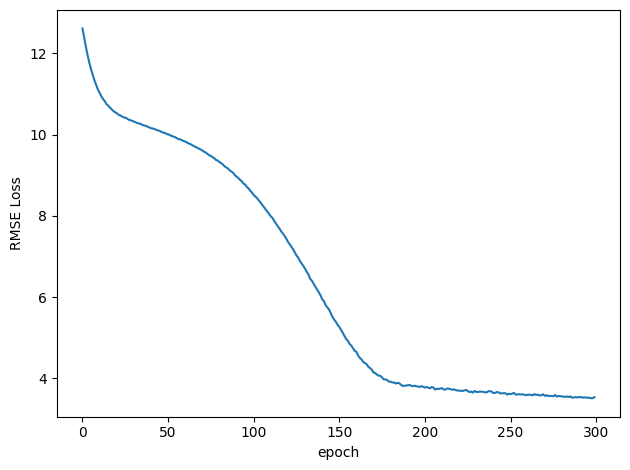

In [50]:
plt.plot(range(epochs), losses_np)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.tight_layout()

In [51]:
with torch.no_grad():
    y_val = model.forward(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.49669838


In [60]:
con_test

tensor([[ 40.7834, -73.9528,  40.7822, -73.9560,   1.0000,   0.2935],
        [ 40.7550, -73.9840,  40.7727, -73.8852,   1.0000,   8.5440],
        [ 40.7849, -73.9495,  40.8017, -73.9342,   2.0000,   2.2643],
        ...,
        [ 40.7381, -74.0047,  40.7412, -73.9959,   1.0000,   0.8233],
        [ 40.7593, -73.9724,  40.7415, -73.9831,   1.0000,   2.1771],
        [ 40.8409, -73.9425,  40.7181, -74.0099,   1.0000,  14.7883]])

In [61]:
torch.save(model.state_dict(), 'TFModel.pt')